In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import os

# Specify the directory where the model files are located
model_directory = 'D:\ML - AL Projects\Object detection'

# Define the filenames
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

# Create the full file paths
config_file_path = os.path.join(model_directory, config_file)
frozen_model_path = os.path.join(model_directory, frozen_model)

# Load the model using the full file paths
model = cv2.dnn_DetectionModel(frozen_model_path, config_file_path)


In [3]:
ClassLabels = []

file_name = 'labels.txt'
file_path = os.path.join('D:\ML - AL Projects\Object detection', file_name)

with open(file_path, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip('\n').split('\n')

In [4]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
len(ClassLabels)

80

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000023FFDCF7E50>

Object Detection - Image

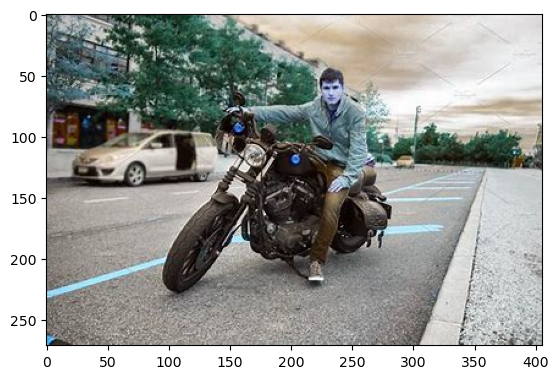

In [7]:
img = cv2.imread('D:\ML - AL Projects\Object detection\OIP.jpeg')
plt.imshow(img)

In [8]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)

In [9]:
print(ClassIndex)

[4 1 3 4]


In [10]:
font_scale = 1  # Adjust this value to control the text size
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    x, y, w, h = boxes
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    class_name = ClassLabels[ClassInd - 1]  # Adjust the class index to match ClassLabels
    org = (x, y - 10)  # Adjust the y-coordinate as needed
    text = f"Class: {class_name}"  # Removed confidence from the text
    cv2.putText(img, text, org, font, font_scale, (255, 255, 255), 2)


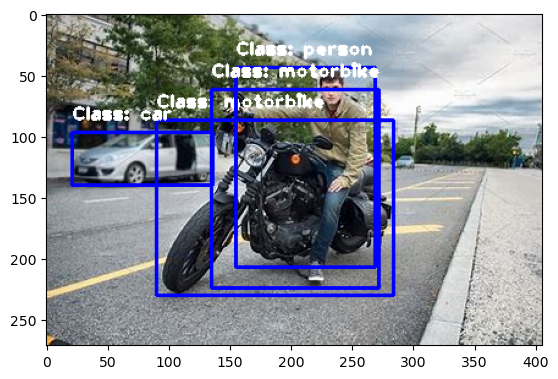

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video

In [12]:
cap = cv2.VideoCapture("D:\ML - AL Projects\Object detection\Vdo.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can\'t open the video')

# Font settings
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

# Set the desired output frame size (width and height)
output_width = 800
output_height = 600

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Resize the frame to the desired output size
    frame = cv2.resize(frame, (output_width, output_height))

    ClassIndex, _, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) > 0:
        for ClassInd, boxes in zip(ClassIndex.flatten(), bbox):
            # Adjust the class index to match ClassLabels
            class_name = ClassLabels[ClassInd - 1]
            x, y, w, h = boxes
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            text = f"Object: {class_name}"
            org = (x, y - 10)  # Adjust the text position
            cv2.putText(frame, text, org, font, font_scale, (255, 255, 255), 2)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Web cam

In [13]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('Can\'t open the webcam')

# Set the input size of the model
model.setInputSize(320, 320)  # Adjust the input size as needed

font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) > 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                class_name = ClassLabels[ClassInd - 1]  # Adjust the class index to match ClassLabels
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                text = f"Object: {class_name}"
                org = (x, y - 10)
                cv2.putText(frame, text, org, font, font_scale, (255, 255, 255), 2)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()